In [3]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Check version
print(tf.__version__)


2.19.0


In [5]:
#directory
source_dir= r'OneDrive/Desktop/Git-pository/Project-I/RiceLeafDisease/archive/RiceLeafsDisease'
train_dir = r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\train"
val_dir   = r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\validation"
test_dir  = r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\test"

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_test_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = val_test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 894 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Found 195 images belonging to 3 classes.


In [9]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [15]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

C:\Users\neha_\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.6841 - loss: 0.7425 - val_accuracy: 0.9289 - val_loss: 0.1783
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.9432 - loss: 0.1723 - val_accuracy: 0.9644 - val_loss: 0.1171
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.9463 - loss: 0.1618 - val_accuracy: 0.9511 - val_loss: 0.1219
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 0.9566 - loss: 0.1283 - val_accuracy: 0.9644 - val_loss: 0.1072
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.9538 - loss: 0.1131 - val_accuracy: 0.9733 - val_loss: 0.0914
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.9574 - loss: 0.1106 - val_accuracy: 0.9644 - val_loss: 0.0925
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.9681 - loss: 0.0853 - val_accuracy: 0.9644 - val_loss: 0.0943
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 0.9803 - loss: 0.0797 - val_accuracy: 0.9689 - v

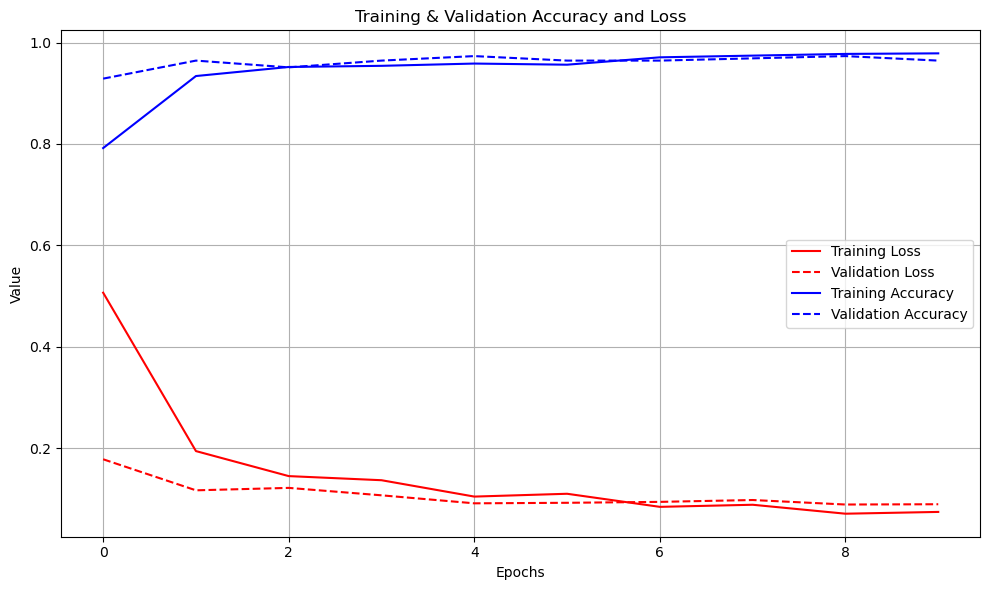

In [21]:
import matplotlib.pyplot as plt

epochs = range(len(history.history['loss']))

plt.figure(figsize=(10, 6))

# Plot loss
plt.plot(epochs, history.history['loss'], 'r-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'r--', label='Validation Loss')

# Plot accuracy
plt.plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b--', label='Validation Accuracy')

plt.title('Training & Validation Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9515 - loss: 0.1842
Test Accuracy: 0.9538461565971375


In [42]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_image_path = r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\test\bacterial_leaf_blight\bacterial_leaf_blight (3).JPG"
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)
predicted_class = train_generator.class_indices
predicted_label = list(predicted_class.keys())[np.argmax(prediction)]
print("Predicted Class:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Predicted Class: brown_spot


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


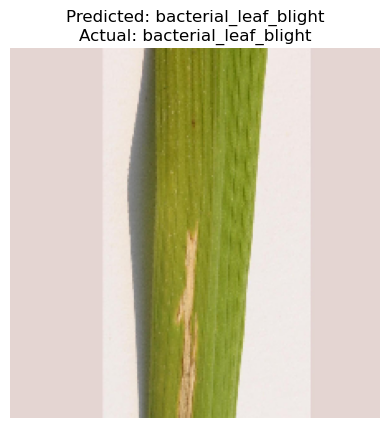

In [68]:
import random
import matplotlib.pyplot as plt

class_names = ['bacterial_leaf_blight', 'brown_spot', 'healthy']

# Get the first batch from the generator
images, labels = test_generator[0]

# Choose a random image from the batch
idx = random.randint(0, len(images) - 1)
img = images[idx]
label = labels[idx]

prediction = model.predict(np.expand_dims(img, axis=0))
predicted_index = np.argmax(prediction)
true_index = np.argmax(label)

# Display the image
plt.imshow(img)
plt.axis("off")
plt.title(f"Label: {label}")
plt.title(f"Predicted: {class_names[predicted_index]}\nActual: {class_names[true_index]}")
plt.show()



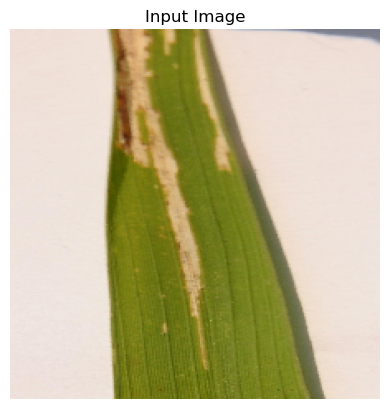

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
✅ Predicted Class: bacterial_leaf_blight


In [70]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\test\bacterial_leaf_blight\bacterial_leaf_blight (306).JPG"
img = image.load_img(img_path, target_size=(224, 224))  # Adjust if your model uses different size

# Display the image
plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Preprocess the image manually
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # ✅ Rescale just like ImageDataGenerator(rescale=1./255)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_array)

# Class decoding
class_names = ['bacterial_leaf_blight', 'brown_spot', 'healthy']  # Adjust based on your project
predicted_class = class_names[np.argmax(prediction)]

print(f"✅ Predicted Class: {predicted_class}")


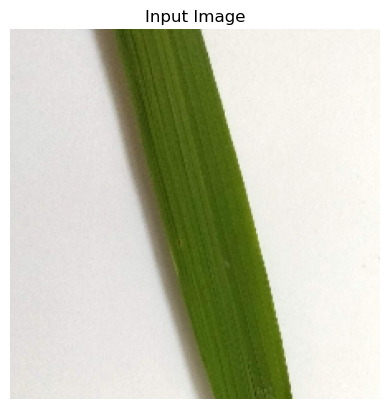

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
✅ Predicted Class: healthy


In [76]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\test\healthy\healthy (261).jpg"
img = image.load_img(img_path, target_size=(224, 224))  # Adjust if your model uses different size

# Display the image
plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Preprocess the image manually
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # ✅ Rescale just like ImageDataGenerator(rescale=1./255)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_array)

# Class decoding
class_names = ['bacterial_leaf_blight', 'brown_spot', 'healthy']  # Adjust based on your project
predicted_class = class_names[np.argmax(prediction)]

print(f"✅ Predicted Class: {predicted_class}")


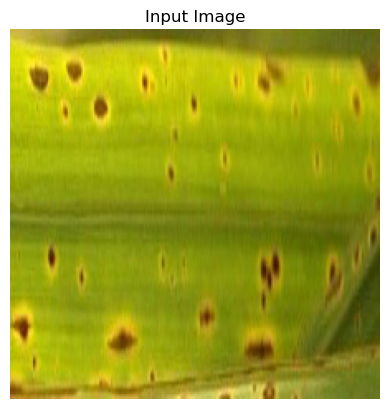

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
✅ Predicted Class: brown_spot


In [74]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = r"C:\Users\neha_\OneDrive\Desktop\Git-pository\Project-I\RiceLeafDisease\archive\RiceLeafsDisease\test\brown_spot\brown_spot (166).jpg"
img = image.load_img(img_path, target_size=(224, 224))  # Adjust if your model uses different size

# Display the image
plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Preprocess the image manually
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # ✅ Rescale just like ImageDataGenerator(rescale=1./255)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_array)

# Class decoding
class_names = ['bacterial_leaf_blight', 'brown_spot', 'healthy']  # Adjust based on your project
predicted_class = class_names[np.argmax(prediction)]

print(f"✅ Predicted Class: {predicted_class}")


In [66]:
model.save("plant_disease_classifier.keras")